# Task 2 - Crop Selection Modeling (Ashwitha Kassetty)

### Data Dictionary
| Column Name       | Description                                               | Data Type    | Units        |
|-------------------|-----------------------------------------------------------|--------------|--------------|
| S. no.            | Serial number of the record                               | Integer      | -            |
| Name              | Name of the vegetable, fruit, or salad                    | String       | -            |
| Soil_Type         | Type of soil (e.g., Sandy Loam)                           | String       | -            |
| Fertility         | Soil fertility level (e.g., High)                         | String       | -            |
| Photoperiod       | Length of day period (e.g., Short Day Period)             | String       | -            |
| N-P-K Ratio       | Ratio of Nitrogen, Phosphorus, and Potassium in soil      | String       | -            |
| Temperature       | Temperature in degrees Celsius                            | Float        | °C           |
| Rainfall          | Amount of rainfall in millimeters                         | Float        | mm           |
| pH                | pH level of the soil                                      | Float        | -            |
| Light_Hours       | Number of light hours per day                             | Float        | hours        |
| Light_Intensity   | Intensity of light received in lumens                     | Float        | lumens       |
| Rh                | Relative humidity percentage                              | Float        | %            |
| Nitrogen          | Amount of nitrogen in the soil                            | Float        | ppm (mg/kg)  |
| Phosphorus        | Amount of phosphorus in the soil                          | Float        | ppm (mg/kg)  |
| Potassium         | Amount of potassium in the soil                           | Float        | ppm (mg/kg)  |
| Yield             | Yield of the vegetable, fruit, or salad in tons per hectare | Float      | tons/ha      |
| Category_pH       | pH category (e.g., low_acidic)                            | String       | -            |
| Season            | Growing season (e.g., Summer)                             | String       | -            |


### Importing necessary libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

### Reading Dataset and General Statistics

In [64]:
# Reading csv file into pandas DataFrame
df = pd.read_csv('preprocessed_700.csv')

df.head()

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall


In [65]:
df.describe()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield
count,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000
mean,21.978474,1048.775960,6.238701,10.708792,428.144454,75.633995,143.077870,97.729048,178.380374,17.792950
std,4.382708,372.439104,0.836081,2.705223,210.594866,19.199301,60.180291,69.558537,90.676584,14.503704
min,9.355908,409.927161,2.940351,5.044913,66.000791,29.877266,40.077805,13.155191,34.982329,0.770213
25%,18.802279,756.618244,6.029328,7.479604,261.001150,55.986653,107.077056,47.208312,117.856142,6.309919
50%,21.424851,995.841172,6.431525,12.016017,403.601654,87.133888,140.252517,70.558185,174.455784,15.916217
75%,24.725214,1204.581048,6.691918,13.026169,573.610828,92.460093,163.848126,129.055964,223.645110,23.618085
max,39.913892,2786.343754,8.219020,16.721979,1028.679529,99.927439,409.639573,360.043619,579.953931,66.619242


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             23800 non-null  object 
 1   Fertility        23800 non-null  object 
 2   Photoperiod      23800 non-null  object 
 3   N-P-K Ratio      23800 non-null  object 
 4   Temperature      23800 non-null  float64
 5   Rainfall         23800 non-null  float64
 6   pH               23800 non-null  float64
 7   Light_Hours      23800 non-null  float64
 8   Light_Intensity  23800 non-null  float64
 9   Rh               23800 non-null  float64
 10  Nitrogen         23800 non-null  float64
 11  Phosphorus       23800 non-null  float64
 12  Potassium        23800 non-null  float64
 13  Yield            23800 non-null  float64
 14  Category_pH      23800 non-null  object 
 15  Soil_Type        23800 non-null  object 
 16  Season           23800 non-null  object 
dtypes: float64(1

In [67]:
df.isnull().sum()

Name               0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Nitrogen           0
Phosphorus         0
Potassium          0
Yield              0
Category_pH        0
Soil_Type          0
Season             0
dtype: int64

In [68]:
df.shape

(23800, 17)

### Feature Engineering & Preprocessing
* Separate N-P-K Ratio into separate columns
* Drop Yield, N-P-K Ratio, and pH Columns
* Preprocessing pipeline for numerical and categorical variables

In [69]:
# Display Categorical Variables
print(df.select_dtypes(include=["object"]).columns)

Index(['Name', 'Fertility', 'Photoperiod', 'N-P-K Ratio', 'Category_pH',
       'Soil_Type', 'Season'],
      dtype='object')


In [70]:
# Display Numerical Variables
print(df.select_dtypes(include=["float64"]).columns)

Index(['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh',
       'Nitrogen', 'Phosphorus', 'Potassium', 'Yield'],
      dtype='object')


In [71]:
# Display the Value counts and the # of unique values for each Categorical column
for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("Number of unique values:"+ str(df[column].nunique()))
    print()
    print("="*45)

Value counts for Name:
Name
Apple             700
Eggplants         700
Endive            700
Kale              700
Lettuce           700
Radicchio         700
Spinach           700
Tomatoes          700
Asparagus         700
Orange            700
Chilli Peppers    700
Cabbage           700
Cucumbers         700
Potatoes          700
Cauliflowers      700
Broccoli          700
Cress             700
Chard             700
Beet              700
Arugula           700
plum              700
pear              700
apricot           700
Grapes            700
Watermelon        700
Kiwi              700
Lemon             700
Cherries          700
Figs              700
Strawberry        700
Blueberry         700
Peach             700
Pomegranate       700
Green Peas        700
Name: count, dtype: int64
Number of unique values:34

Value counts for Fertility:
Fertility
High        14000
Moderate     9800
Name: count, dtype: int64
Number of unique values:2

Value counts for Photoperiod:
Photoperiod
S

In [72]:
nitrogen_ratio = []
phosphorus_ratio = []
potassium_ratio = []

for data in df['N-P-K Ratio']:
  ratio = data.split(':')
  nitrogen_ratio.append(float(ratio[0]))
  phosphorus_ratio.append(float(ratio[1]))
  potassium_ratio.append(float(ratio[2]))

In [73]:
df['Nitrogen_Ratio'] = nitrogen_ratio
df['Phosphorus_Ratio'] = phosphorus_ratio
df['Potassium_Ratio'] = potassium_ratio

In [74]:
df.head()

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall,10.0,10.0,10.0
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring,10.0,10.0,10.0
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall,10.0,10.0,10.0


In [75]:
df.drop(columns=['N-P-K Ratio'], inplace=True)

In [76]:
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,Apple,High,Day Neutral,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
1,Apple,High,Day Neutral,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall,10.0,10.0,10.0
2,Apple,High,Day Neutral,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
3,Apple,High,Short Day Period,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring,10.0,10.0,10.0
4,Apple,High,Day Neutral,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall,10.0,10.0,10.0


In [77]:
df.drop(columns=['Yield'], inplace=True)

In [78]:
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,Apple,High,Day Neutral,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
1,Apple,High,Day Neutral,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,neutral,Sandy Loam,Fall,10.0,10.0,10.0
2,Apple,High,Day Neutral,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
3,Apple,High,Short Day Period,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,neutral,Sandy Loam,Spring,10.0,10.0,10.0
4,Apple,High,Day Neutral,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,neutral,Sandy Loam,Fall,10.0,10.0,10.0


In [79]:
df.drop(columns=['pH'], inplace=True)

In [80]:
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
0,Apple,High,Day Neutral,21.063204,1932.402709,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
1,Apple,High,Day Neutral,19.511305,1589.295994,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,neutral,Sandy Loam,Fall,10.0,10.0,10.0
2,Apple,High,Day Neutral,23.045662,1269.789133,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,low_acidic,Sandy Loam,Fall,10.0,10.0,10.0
3,Apple,High,Short Day Period,17.986016,1944.180144,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,neutral,Sandy Loam,Spring,10.0,10.0,10.0
4,Apple,High,Day Neutral,23.775354,1790.352815,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,neutral,Sandy Loam,Fall,10.0,10.0,10.0


In [81]:
df.shape

(23800, 17)

In [82]:
df.describe()

,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Nitrogen_Ratio,Phosphorus_Ratio,Potassium_Ratio
count,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000
mean,21.978474,1048.775960,10.708792,428.144454,75.633995,143.077870,97.729048,178.380374,11.588235,10.985294,11.338235
std,4.382708,372.439104,2.705223,210.594866,19.199301,60.180291,69.558537,90.676584,11.583999,4.781322,6.871569
min,9.355908,409.927161,5.044913,66.000791,29.877266,40.077805,13.155191,34.982329,5.000000,6.000000,5.000000
25%,18.802279,756.618244,7.479604,261.001150,55.986653,107.077056,47.208312,117.856142,10.000000,10.000000,10.000000
50%,21.424851,995.841172,12.016017,403.601654,87.133888,140.252517,70.558185,174.455784,10.000000,10.000000,10.000000
75%,24.725214,1204.581048,13.026169,573.610828,92.460093,163.848126,129.055964,223.645110,10.000000,10.000000,10.000000
max,39.913892,2786.343754,16.721979,1028.679529,99.927439,409.639573,360.043619,579.953931,75.000000,37.500000,37.500000


In [83]:
df.columns

Index(['Name', 'Fertility', 'Photoperiod', 'Temperature', 'Rainfall',
       'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus',
       'Potassium', 'Category_pH', 'Soil_Type', 'Season', 'Nitrogen_Ratio',
       'Phosphorus_Ratio', 'Potassium_Ratio'],
      dtype='object')

In [84]:
# Display Categorical Variables
print(df.select_dtypes(include=["object"]).columns)

Index(['Name', 'Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type',
       'Season'],
      dtype='object')


In [85]:
# Display Categorical Variables
print(df.select_dtypes(include=["float64"]).columns)

Index(['Temperature', 'Rainfall', 'Light_Hours', 'Light_Intensity', 'Rh',
       'Nitrogen', 'Phosphorus', 'Potassium', 'Nitrogen_Ratio',
       'Phosphorus_Ratio', 'Potassium_Ratio'],
      dtype='object')


In [86]:
# Initializing the training and target variable columns
x_var = ['Fertility', 'Photoperiod', 'Temperature', 'Rainfall',
       'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus',
       'Potassium', 'Category_pH', 'Soil_Type', 'Season', 'Nitrogen_Ratio',
       'Phosphorus_Ratio', 'Potassium_Ratio']
y_var = ['Name']

In [87]:
# Initializing X and Y DataFrames for train-valid-test split  
X = df[x_var]
y = df[y_var]
y = pd.DataFrame(y, columns=['Name'])

In [88]:
# Double-checking the type of X and Y variables
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [89]:
X.shape

(23800, 16)

In [90]:
y.shape

(23800, 1)

In [91]:
y = LabelEncoder().fit_transform(y)

c:\Users\Ashwitha Kassetty\anaconda3\envs\phoenv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
print(y)

[ 0  0  0 ... 17 17 17]


In [93]:
# Splitting into train and test dataset in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (16660, 16)
y_train.shape: (16660,)
X_test.shape: (7140, 16)
y_test.shape: (7140,)


In [94]:
# Separating the categorical and numerical columns for Pipeline Preprocessing
cat_var = ['Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type', 'Season']
num_var = ['Temperature', 'Rainfall', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus', 'Potassium', 'Nitrogen_Ratio',
       'Phosphorus_Ratio', 'Potassium_Ratio']

In [95]:
# Building pipelines for data transformation-
# Applying two transforms - One Hot Encoding, and Standard Scaling

pipeline_categorical = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
    ])

pipeline_numerical = Pipeline(steps=[
    ('scaler',StandardScaler(with_mean=False))
    ])


pipeline_full = ColumnTransformer([
                                ("categorical", pipeline_categorical, cat_var),
                                   ("numerical", pipeline_numerical, num_var)])

In [96]:
# Fitting the transforms to the training dataset and applying the transformation to the training dataset
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print('X_train_transformed:', type(X_train_transformed))

X_train_transformed.shape: (16660, 27)
X_train_transformed: <class 'numpy.ndarray'>


In [97]:
# Function to get feature names
def get_feature_names(column_transformer, input_features):
    output_feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue

        if isinstance(transformer, Pipeline):
            transformer = transformer.steps[-1][1]

        if isinstance(transformer, OneHotEncoder):
            feature_names = transformer.get_feature_names_out(columns)
        elif isinstance(transformer, StandardScaler):
            feature_names = columns
        elif hasattr(transformer, 'get_feature_names_out'):
            feature_names = transformer.get_feature_names_out()
        else:
            feature_names = columns

        output_feature_names.extend(feature_names)

    return output_feature_names

# Obtain the list of input features
input_features = cat_var + num_var

# Get the feature names after transformation
feature_names = get_feature_names(pipeline_full, input_features)

# Convert the transformed data to a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

# Print the resulting feature names and DataFrame
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print("Feature Names after Transformation:", feature_names)
print("Transformed DataFrame:")
print(X_train_transformed_df.head())


X_train_transformed.shape: (16660, 27)
Feature Names after Transformation: ['Fertility_High', 'Fertility_Moderate', 'Photoperiod_Day Neutral', 'Photoperiod_Long Day Period', 'Photoperiod_Short Day Period', 'Category_pH_acidic', 'Category_pH_low_acidic', 'Category_pH_low_alkaline', 'Category_pH_neutral', 'Soil_Type_Loam', 'Soil_Type_Sandy', 'Soil_Type_Sandy Loam', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Temperature', 'Rainfall', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus', 'Potassium', 'Nitrogen_Ratio', 'Phosphorus_Ratio', 'Potassium_Ratio']
Transformed DataFrame:
   Fertility_High  Fertility_Moderate  Photoperiod_Day Neutral  \
0             0.0                 1.0                      0.0   
1             1.0                 0.0                      0.0   
2             0.0                 1.0                      1.0   
3             0.0                 1.0                      0.0   
4             1.0                 0.0               

In [98]:
# Applying the transformation on the test dataset based on training dataset parameter fit
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print('X_test_transformed:', type(X_test_transformed))

X_test_transformed.shape: (7140, 27)
X_test_transformed: <class 'numpy.ndarray'>


## Modeling

In [99]:
# Define the models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    #'Logistic Regression': LogisticRegression(max_iter=10000),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier()
}

In [100]:
model_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
train_accuracy_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_transformed,y_train)

    # Make final predictions on the test data
    y_pred_train = model.predict(X_train_transformed)
    y_pred_test = model.predict(X_test_transformed)
    
    
    # Evaluate the model
    t_accuracy = accuracy_score(y_train, y_pred_train)
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    model_list.append(list(models.keys())[i])
    train_accuracy_list.append(t_accuracy)
    test_accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1score_list.append(f1)
    
    print(f'Model: {model}')
    print(f'Training Accuracy: {t_accuracy:.4f}')
    print(f'Testing Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    #print('Classification Report:')
    #print(classification_report(y_test, y_pred_test))
    print('-' * 40)
    

Model: DecisionTreeClassifier()
Training Accuracy: 1.0000
Testing Accuracy: 0.9985
Precision: 0.9985
Recall: 0.9985
F1 Score: 0.9985
----------------------------------------
Model: RandomForestClassifier()
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
----------------------------------------
Model: GradientBoostingClassifier()
Training Accuracy: 1.0000
Testing Accuracy: 0.9987
Precision: 0.9988
Recall: 0.9987
F1 Score: 0.9987
----------------------------------------
Model: SVC()
Training Accuracy: 0.9998
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
----------------------------------------
Model: KNeighborsClassifier()
Training Accuracy: 0.9999
Testing Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999
----------------------------------------
Model: GaussianNB()
Training Accuracy: 0.9999
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------

In [101]:
print(len(test_accuracy_list))

8


In [102]:
evaluation_df = pd.DataFrame({
    'Model': model_list,
    'Training Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1score_list})

evaluation_df.sort_values(by="Test Accuracy", ascending=True)

,Model,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.00000,0.998459,0.998472,0.998459,0.99846
2,Gradient Boosting,1.00000,0.998739,0.998750,0.998739,0.99874
7,LightGBM,1.00000,0.999300,0.999307,0.999300,0.99930
6,XGBoost,1.00000,0.999440,0.999447,0.999440,0.99944
4,K-Nearest Neighbors,0.99994,0.999860,0.999861,0.999860,0.99986
1,Random Forest,1.00000,1.000000,1.000000,1.000000,1.00000
3,Support Vector Machine,0.99982,1.000000,1.000000,1.000000,1.00000
5,Naive Bayes,0.99988,1.000000,1.000000,1.000000,1.00000


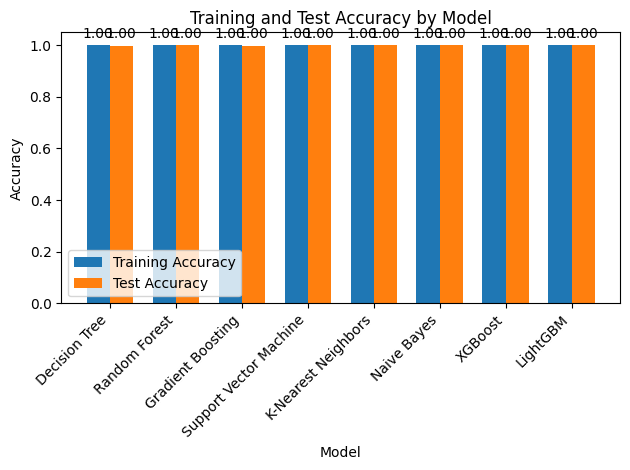

In [103]:
# Plotting the training and test accuracies
x = np.arange(len(model_list))
width = 0.35
    
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracy_list, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracy_list, width, label='Test Accuracy')
    
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_list, rotation=45, ha='right')
ax.legend()
    
# Adding accuracy values on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
add_labels(rects1)
add_labels(rects2)
    
plt.tight_layout()
plt.show()